In [114]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, callbacks, regularizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Cargar el dataset
file_path = "/content/diet_recommendations_dataset (1).csv" #Path del dataset
df = pd.read_csv(file_path)

# Identificar las columnas categóricas a codificar
categorical_columns = ["Gender", "Disease_Type", "Severity", "Physical_Activity_Level",
                       "Dietary_Restrictions", "Allergies", "Preferred_Cuisine"]

# Aplicar LabelEncoder a cada columna categórica
encoders = {}
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Codificar la variable objetivo
y_encoder = LabelEncoder()
df["Diet_Recommendation"] = y_encoder.fit_transform(df["Diet_Recommendation"])

# Definir variables predictoras y objetivo
X = df.drop(columns=["Diet_Recommendation", "Patient_ID"])
y = df["Diet_Recommendation"]


# Verificar el desbalance de clases
class_counts = y.value_counts()
min_class_count = class_counts.min()

# Balanceo de clases por submuestreo
balanced_df = pd.concat([df[df["Diet_Recommendation"] == cls].sample(min_class_count, random_state=42)
                         for cls in class_counts.index])

# Definir nuevas variables predictoras y objetivo balanceados
X_balanced = balanced_df.drop(columns=["Diet_Recommendation", "Patient_ID"])
y_balanced = balanced_df["Diet_Recommendation"]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Normalización para modelos que la necesitan
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Guardar el dataset balanceado y codificado
balanced_df.to_csv("balanced_encoded_diet_recommendations.csv", index=False)


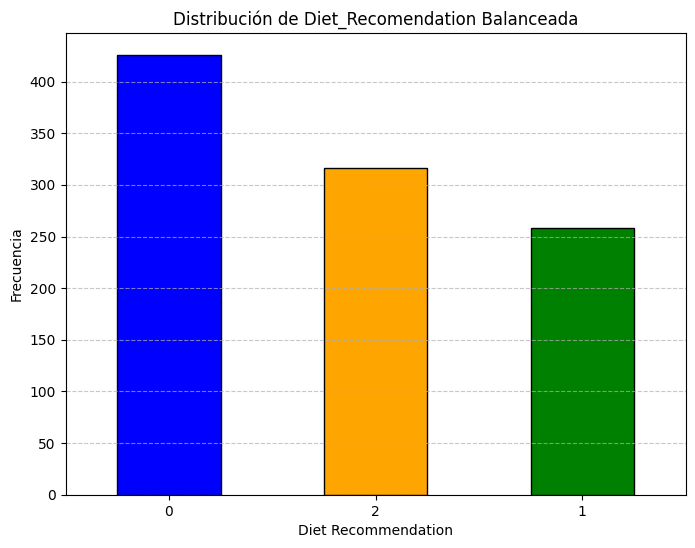

In [115]:
# Mostrar la distribución de la variable balanceada
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue','orange','green'], edgecolor='black')
plt.title("Distribución de Diet_Recomendation Balanceada")
plt.xlabel("Diet Recommendation")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

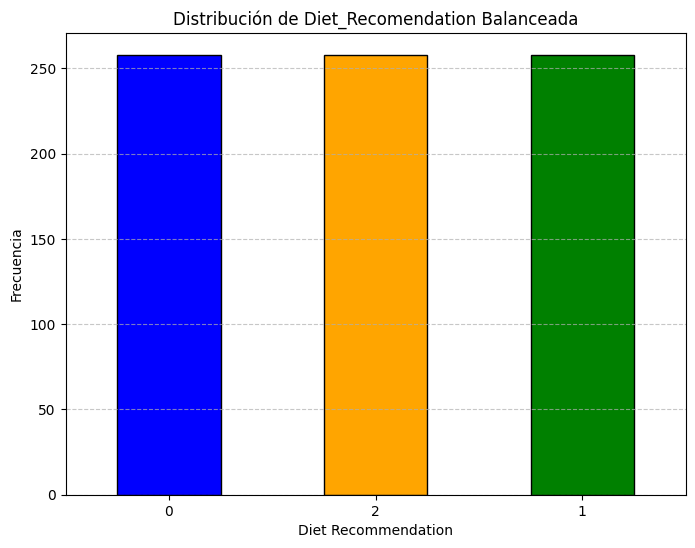

In [116]:
# Mostrar la distribución de la variable balanceada
plt.figure(figsize=(8, 6))
y_balanced.value_counts().plot(kind='bar', color=['blue','orange','green'], edgecolor='black')
plt.title("Distribución de Diet_Recomendation Balanceada")
plt.xlabel("Diet Recommendation")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 1.0000

Matriz de Confusión - Logistic Regression:


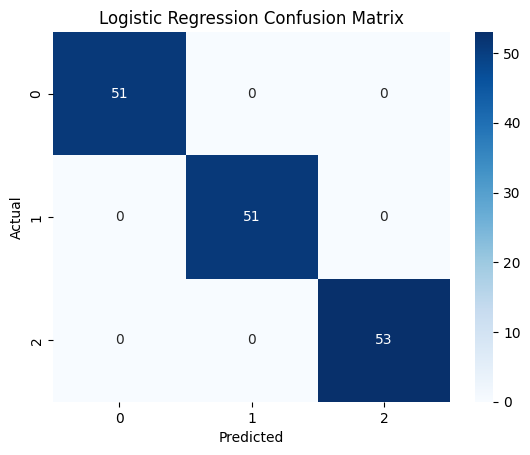


Reporte de Clasificación - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        53

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [117]:
from sklearn.linear_model import LogisticRegression

# Modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=10, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
log_reg_predictions = log_reg.predict(X_test_scaled)

# Evaluación
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# Matriz de Confusión
print("\nMatriz de Confusión - Logistic Regression:")
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nReporte de Clasificación - Logistic Regression:")
print(classification_report(y_test, log_reg_predictions))


Naive Bayes Accuracy: 1.0000

Matriz de Confusión - Naive Bayes:


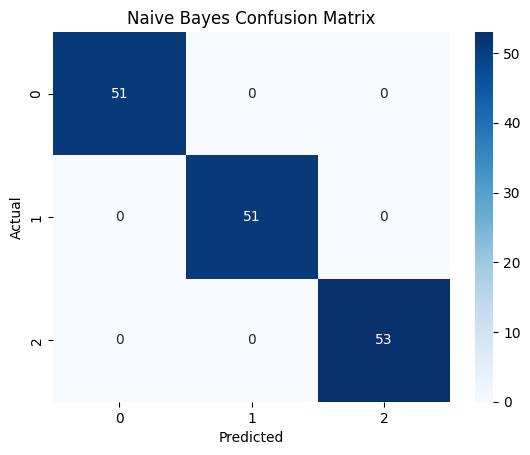


Reporte de Clasificación - Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        53

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



In [118]:
from sklearn.naive_bayes import GaussianNB

# Modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predicciones
nb_predictions = nb_model.predict(X_test_scaled)

# Evaluación
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

# Matriz de Confusión
print("\nMatriz de Confusión - Naive Bayes:")
nb_cm = confusion_matrix(y_test, nb_predictions)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nReporte de Clasificación - Naive Bayes:")
print(classification_report(y_test, nb_predictions))


In [140]:
#Red Nuronal MLP
nn_model = keras.Sequential([
    layers.Dense(64, activation=None, kernel_regularizer=regularizers.l2(0.004), input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.1),
    layers.Dense(32, activation=None, kernel_regularizer=regularizers.l2(0.004)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.1),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Configurar Early Stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compilar el modelo con learning rate más bajo
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
nn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar la red neuronal
history = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.3, callbacks=[early_stopping])

# Evaluar la red neuronal
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")




Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3833 - loss: 1.6202 - val_accuracy: 0.3763 - val_loss: 1.4015
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4057 - loss: 1.5395 - val_accuracy: 0.3656 - val_loss: 1.3962
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4158 - loss: 1.5206 - val_accuracy: 0.3548 - val_loss: 1.3882
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3978 - loss: 1.4711 - val_accuracy: 0.3656 - val_loss: 1.3798
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4305 - loss: 1.4411 - val_accuracy: 0.3710 - val_loss: 1.3689
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3953 - loss: 1.4475 - val_accuracy: 0.3925 - val_loss: 1.3552
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4785 - loss: 1.3756 - val_accuracy: 0.3925 - val_loss: 1.3402
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4604 - loss: 1.3422 - val_accuracy: 0.3978 - val_loss: 

In [134]:
# Random Forest (sin normalización)
rf_model = RandomForestClassifier(
    n_estimators=9,
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=15,
    max_features='log2',
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Evaluación de overfitting en Random Forest
rf_train_predictions = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print(f"Random Forest Train Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")


# Mostrar información sobre las hojas del bosque aleatorio
rf_n_leaves = [tree.get_n_leaves() for tree in rf_model.estimators_]
print(f"Número promedio de hojas por árbol en Random Forest: {np.mean(rf_n_leaves):.2f}")
print(f"Número máximo de hojas en un árbol del bosque: {np.max(rf_n_leaves)}")
print(f"Número mínimo de hojas en un árbol del bosque: {np.min(rf_n_leaves)}")


Random Forest Accuracy: 0.9871
Random Forest Train Accuracy: 0.9952
Random Forest Test Accuracy: 0.9871
Número promedio de hojas por árbol en Random Forest: 8.56
Número máximo de hojas en un árbol del bosque: 12
Número mínimo de hojas en un árbol del bosque: 3



Matriz de Confusión - Random Forest:


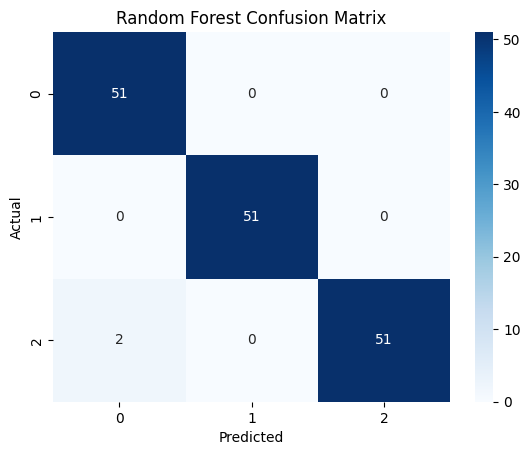

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Matriz de Confusión - Neural Network:


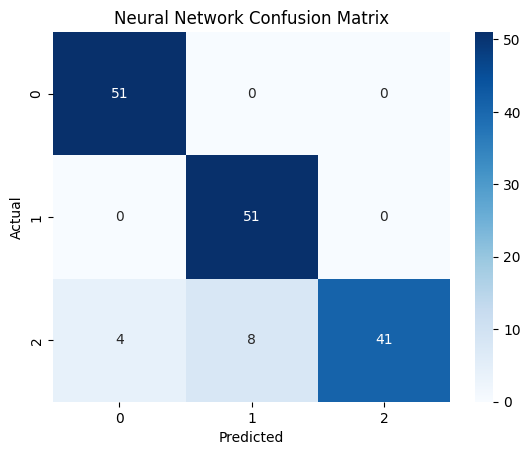

Random Forest Accuracy: 0.9871
Neural Network Accuracy: 0.9226


In [141]:

# Matriz de confusión - Random Forest
print("\nMatriz de Confusión - Random Forest:")
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predicciones de la Red Neuronal
y_pred_nn = np.argmax(nn_model.predict(X_test_scaled), axis=1)

# Matriz de confusión - Red Neuronal
print("\nMatriz de Confusión - Neural Network:")
nn_cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

In [144]:
# Reporte Neural Network
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print("\nReporte de Clasificación - Neural Network:")
print(classification_report(y_test, y_pred_nn))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9199 - loss: 0.5494

Reporte de Clasificación - Neural Network:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       0.86      1.00      0.93        51
           2       1.00      0.77      0.87        53

    accuracy                           0.92       155
   macro avg       0.93      0.92      0.92       155
weighted avg       0.93      0.92      0.92       155



In [137]:
#Reporte Random Forest
print("\nReporte de Clasificación - Random Forest:")
print(classification_report(y_test, rf_predictions))



Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      1.00      1.00        51
           2       1.00      0.96      0.98        53

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



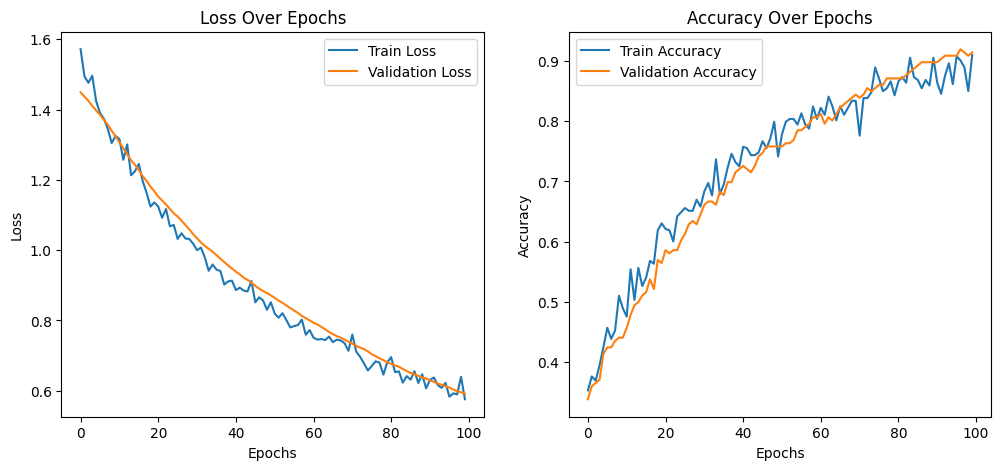

No hay signos significativos de Overfitting.
Random Forest Accuracy: 0.9871
Neural Network Accuracy: 0.9097


In [138]:
# Gráficos para evaluar Overfitting
plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

# Evaluar si hay Overfitting
diff_accuracy = abs(history.history['accuracy'][-1] - history.history['val_accuracy'][-1])
if diff_accuracy > 0.1:
    print("Advertencia: Posible Overfitting detectado (Diferencia entre Train y Validation Accuracy > 0.1)")
else:
    print("No hay signos significativos de Overfitting.")

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")